In [1]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.

1, 2, 3, 4, ..., 50
- GridSearch : search hết 50 --> kết quả tối ưu nhất --> Chậm 
- RandomizedSearch: search random pick, kiểm soát số vòng lặp, kết quả tốt nhất (có thể không phải tối ưu nhất) --> Nhanh

In [2]:
data = load_iris()

In [3]:
df = pd.DataFrame(data.get('data'), columns=data.get('feature_names'))

In [4]:
df['target'] = data.get('target')

In [5]:
df['target_name'] = df.target

In [6]:
df['target_name'] = df.target_name.map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [26]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [27]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :4], df[['target']], shuffle=True, test_size=0.2)

In [28]:
X_train.shape[0] == y_train.shape[0]

True

```
Generalization: Học 1 nơi, áp dụng được nhiều nơi.
    
Overfit: Học 1 nơi, chỉ hiểu 1 nơi. Không áp dụng được cho những nơi khác. Chỉ tốt trên tập train, khônng tốt trên test
    
Underfit: Học 1 nơi, không hiểu gì cả. Không tốt trên cả tập train và test. 
    
Train_test_split: Train --> Làm tốt trên tập test.

```

In [29]:
# Training
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
25,5.0,3.0,1.6,0.2
34,4.9,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
141,6.9,3.1,5.1,2.3
19,5.1,3.8,1.5,0.3
...,...,...,...,...
109,7.2,3.6,6.1,2.5
145,6.7,3.0,5.2,2.3
29,4.7,3.2,1.6,0.2
3,4.6,3.1,1.5,0.2


In [32]:
X_test.iloc[:, :3]

,sepal length (cm),sepal width (cm),petal length (cm)
93,5.0,2.3,3.3
127,6.1,3.0,4.9
33,5.5,4.2,1.4
24,4.8,3.4,1.9
80,5.5,2.4,3.8
83,6.0,2.7,5.1
57,4.9,2.4,3.3
99,5.7,2.8,4.1
92,5.8,2.6,4.0
128,6.4,2.8,5.6


In [33]:
# Predicting
y_predicted = tree.predict(X_test.iloc[:, :3])
# y_true = np.array([item[0] for item in y_test.to_numpy()])
# # Compare y_true and y_predicted
# print(classification_report(y_true, y_predicted))
# tree.score(X_test, y_test)*100

ValueError: Number of features of the model must match the input. Model n_features is 4 and input n_features is 3 

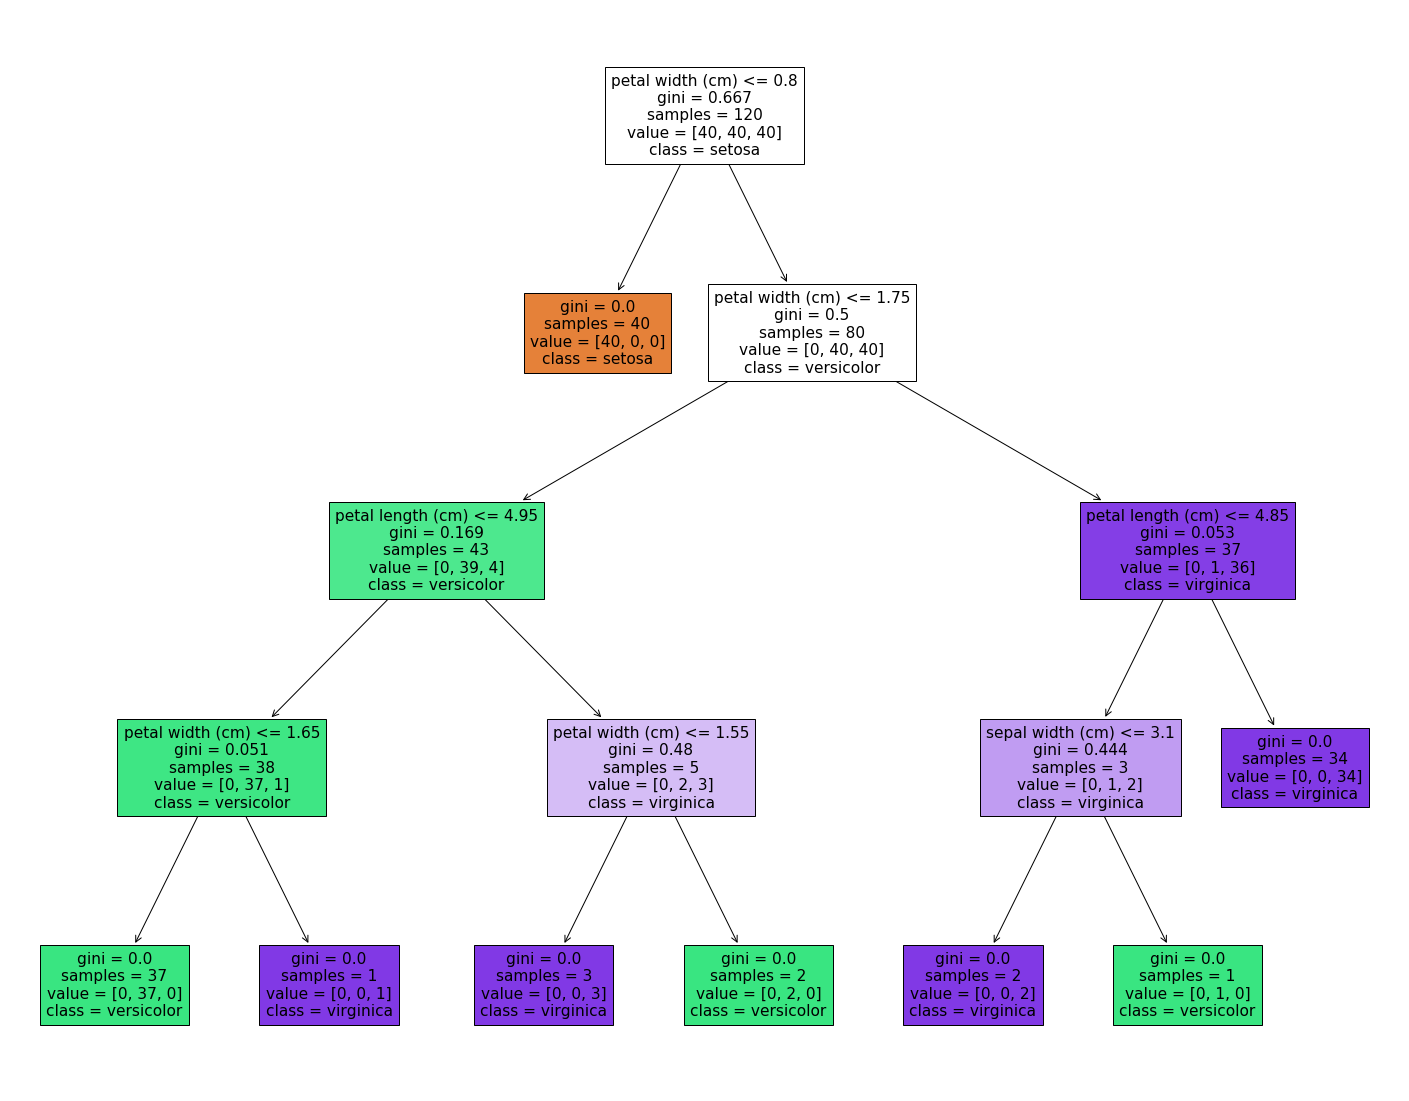

In [11]:
fig = plt.figure(figsize=(25,20))
plot_tree(tree, 
        feature_names=data.feature_names,  
        class_names=data.target_names,
        filled=True)
plt.show()

In [12]:
tree.get_depth()

4

## Tuning:
Change hyper-parameters

In [13]:
# Training
tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
tree.fit(X_train, y_train)

# Predicting
y_predicted = tree.predict(X_test)
y_true = np.array([item[0] for item in y_test.to_numpy()])
# Compare y_true and y_predicted
print(classification_report(y_true, y_predicted))
tree.score(X_test, y_test)*100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



100.0

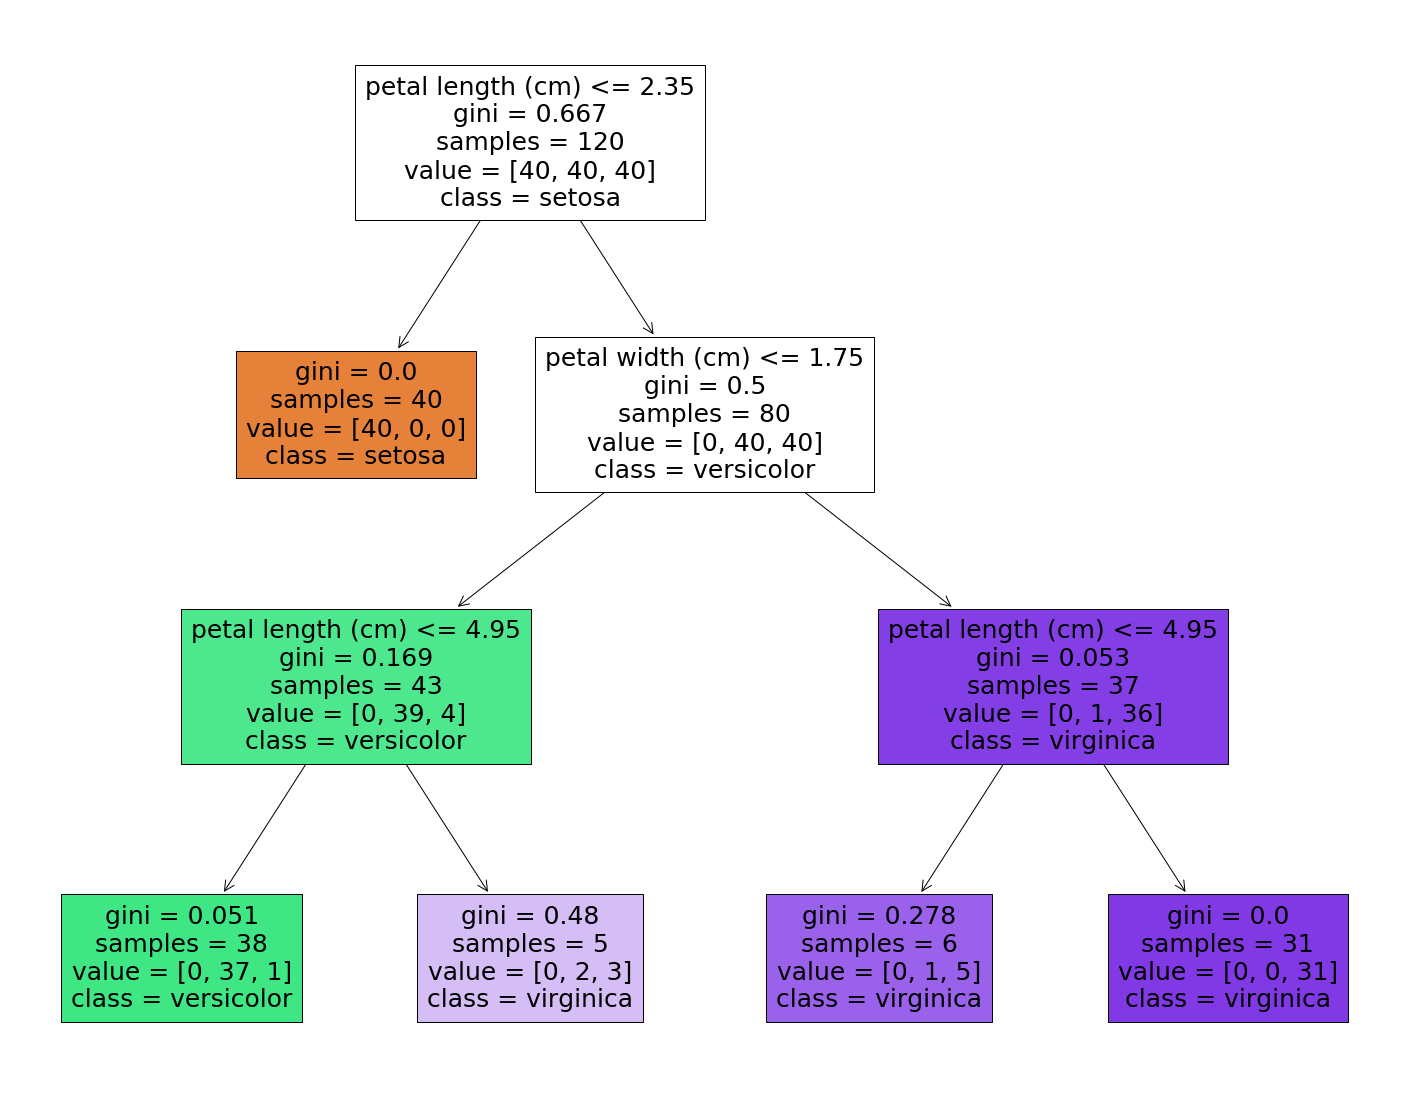

3


In [14]:
fig = plt.figure(figsize=(25,20))
plot_tree(tree, 
        feature_names=data.feature_names,  
        class_names=data.target_names,
        filled=True)
plt.show()
print(tree.get_depth())

## GridSearch

In [15]:
3*3*3*5

135

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [17]:
params = {"max_depth": [2, 3, 4],
          "min_samples_split": [2, 3, 4],
          "min_samples_leaf": [5, 6, 7],
          "criterion": ['gini', 'entropy']
}

tree = DecisionTreeClassifier()
grid_search = GridSearchCV(tree, params, n_jobs=8, cv=5, verbose=2, return_train_score=True)
grid_search.fit(df.iloc[:, :4], df.target)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=8)]: Done 255 out of 270 | elapsed:    7.2s remaining:    0.4s
[Parallel(n_jobs=8)]: Done 270 out of 270 | elapsed:    7.3s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [2, 3, 4]},
             return_train_score=True, verbose=2)

In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [19]:
grid_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

## Randomized

In [22]:
params = {"max_depth": [2, 3, 4],
          "min_samples_split": [2, 3, 4],
          "min_samples_leaf": [5, 6, 7],
          "criterion": ['gini', 'entropy']
}

tree = DecisionTreeClassifier()
grid_search = RandomizedSearchCV(tree, params, n_iter=10, n_jobs=8, cv=5, verbose=2, return_train_score=True)
grid_search.fit(df.iloc[:, :4], df.target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [5, 6, 7],
                                        'min_samples_split': [2, 3, 4]},
                   return_train_score=True, verbose=2)

In [23]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=7,
                       min_samples_split=4)

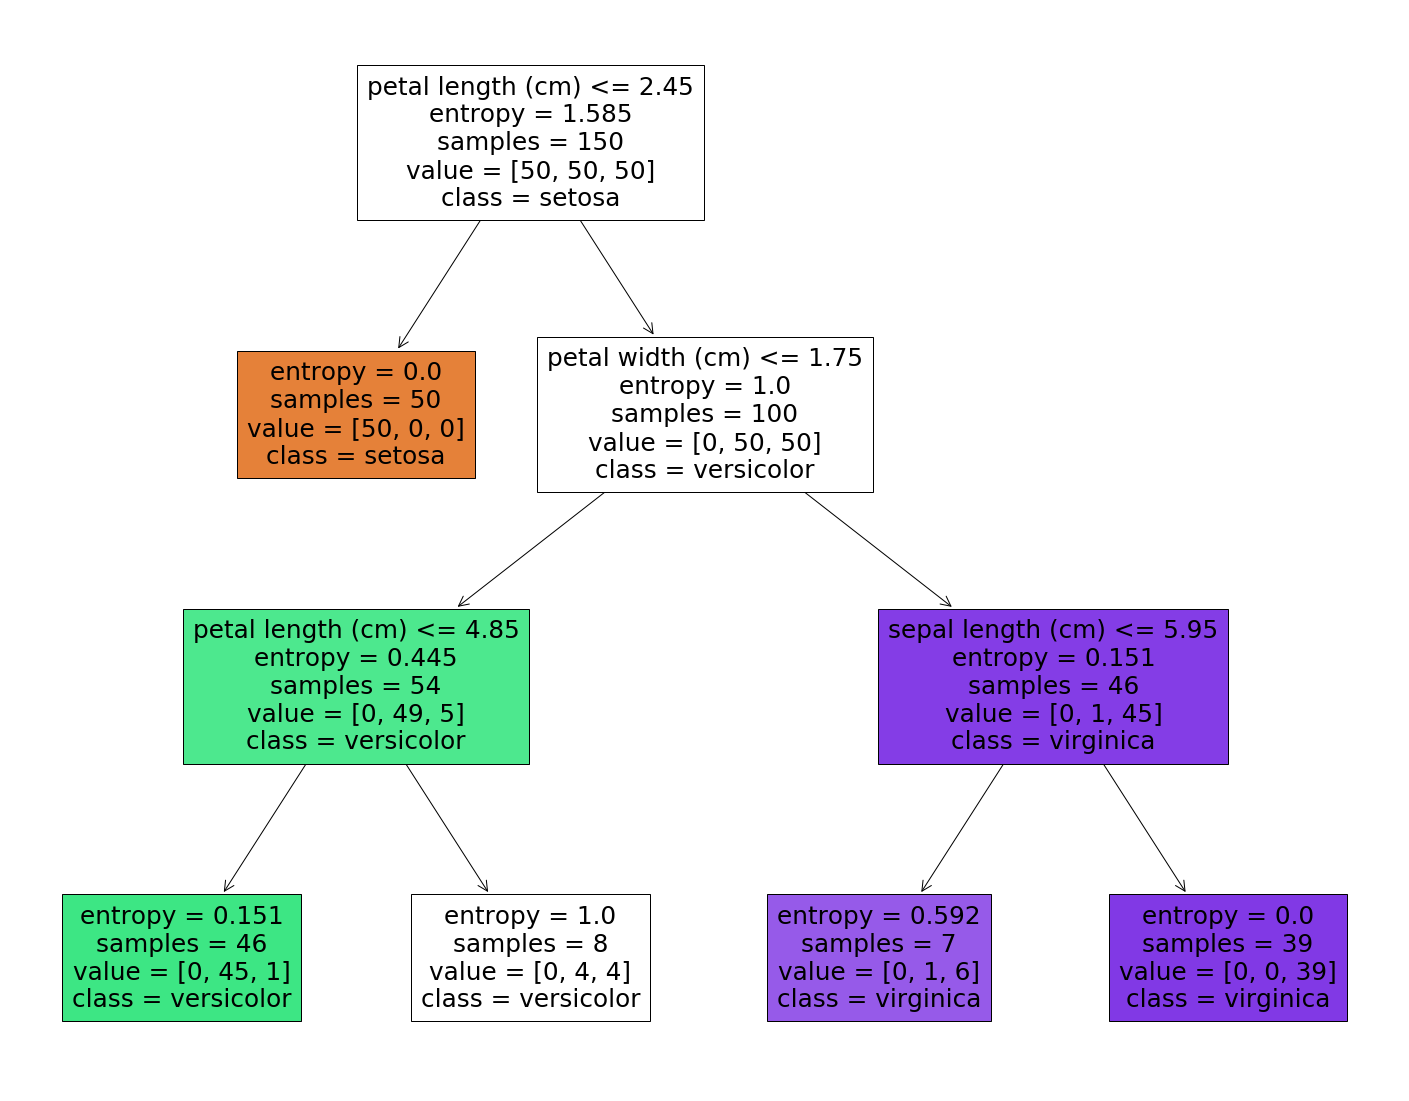

3


In [25]:
fig = plt.figure(figsize=(25,20))
plot_tree(grid_search.best_estimator_, 
        feature_names=data.feature_names,  
        class_names=data.target_names,
        filled=True)
plt.show()
print(grid_search.best_estimator_.get_depth())

- GridSearch: Tối ưu <--> lâu
- Randomized: Có thể tối ưu <--> nhanh 

Trade-off

Reusable 